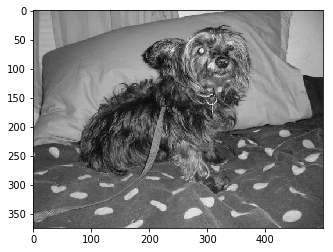

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/Sidharth Singh/Desktop/my_project/cats_and_dogs_filtered/cats_and_dogs_filtered/train"
CATEGORIES=["dogs","cats"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break


In [3]:
print(img_array.shape)

(375, 499)


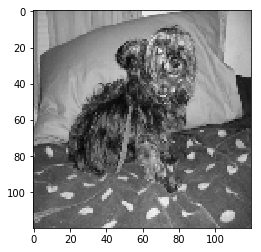

In [4]:
IMG_SIZE=120
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [26]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [27]:
print(len(training_data))
print(img_array)

2000
[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]


In [7]:
import random
random.shuffle(training_data)

In [8]:
for s in training_data[:10]:
    print(s[1])

0
0
0
0
0
0
1
0
0
1


In [9]:
x=[]
y=[]

In [10]:
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE, 1)

In [11]:
import pickle

pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()


In [12]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

In [13]:
y[1]

0

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPooling2D
import pickle

x=pickle.load(open("x.pickle","rb"))
x=pickle.load(open("y.pickle","rb"))

x=x/255.0

model= Sequential()
model.add(Conv2D(64,(3,3),input_shape=x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)


C:\Users\Sidharth Singh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sidharth Singh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sidharth Singh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sidharth Singh\Anaconda3\lib\site-packages\tensorflow\python\framework

Train on 1800 samples, validate on 200 samples
Epoch 1/10
1800/1800 [==============================] - 78s 43ms/sample - loss: 0.6956 - accuracy: 0.5050 - val_loss: 0.6920 - val_accuracy: 0.5150
Epoch 2/10
1800/1800 [==============================] - 75s 42ms/sample - loss: 0.6871 - accuracy: 0.5817 - val_loss: 0.6773 - val_accuracy: 0.5550
Epoch 3/10
1800/1800 [==============================] - 74s 41ms/sample - loss: 0.6631 - accuracy: 0.6122 - val_loss: 0.6610 - val_accuracy: 0.6150
Epoch 4/10
1800/1800 [==============================] - 78s 43ms/sample - loss: 0.5884 - accuracy: 0.6839 - val_loss: 0.6722 - val_accuracy: 0.5850
Epoch 5/10
1800/1800 [==============================] - 80s 44ms/sample - loss: 0.4978 - accuracy: 0.7539 - val_loss: 0.6357 - val_accuracy: 0.6450
Epoch 6/10
1800/1800 [==============================] - 80s 44ms/sample - loss: 0.3733 - accuracy: 0.8339 - val_loss: 0.6706 - val_accuracy: 0.6500
Epoch 7/10
1800/1800 [==============================] - 77s 43ms/

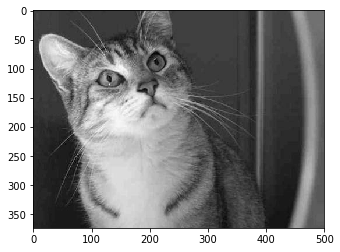

[[[[ 59]
   [ 60]
   [ 59]
   ...
   [109]
   [105]
   [104]]

  [[ 61]
   [ 60]
   [ 62]
   ...
   [107]
   [107]
   [104]]

  [[ 58]
   [ 66]
   [ 63]
   ...
   [106]
   [107]
   [109]]

  ...

  [[ 36]
   [ 35]
   [ 37]
   ...
   [ 88]
   [ 88]
   [ 88]]

  [[ 36]
   [ 36]
   [ 36]
   ...
   [ 87]
   [ 85]
   [ 86]]

  [[ 36]
   [ 36]
   [ 36]
   ...
   [ 84]
   [ 84]
   [ 84]]]]
dog


In [19]:


IMG_PATH="C:/Users/Sidharth Singh/Desktop/my_project/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats/cat.2140.jpg"

img_a=cv2.imread(os.path.join(path,IMG_PATH),cv2.IMREAD_GRAYSCALE)
plt.imshow(img_a,cmap="gray")
plt.show()
img_a=cv2.resize(img_a,(IMG_SIZE,IMG_SIZE))
testx=np.array(img_a).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
res=model.predict(testx)
print(testx)
if(res==0):
    print("dog")
else:
    print("cat")